In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [34]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


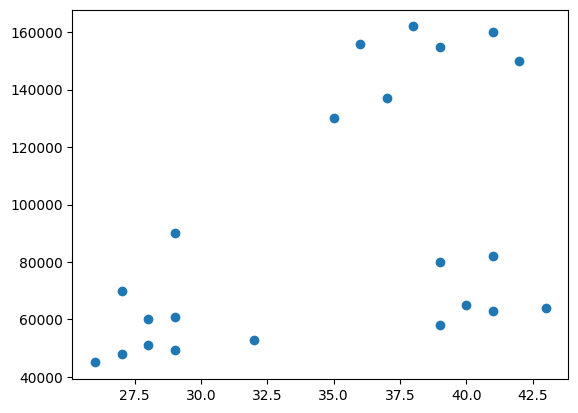

In [35]:
plt.scatter(df.Age,df['Income($)'])

In [36]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [37]:
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [38]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


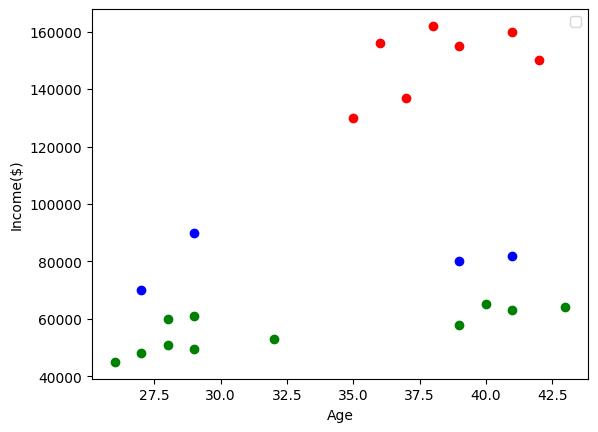

In [39]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color = 'green')
plt.scatter(df1.Age,df1['Income($)'],color = 'red')
plt.scatter(df2.Age,df2['Income($)'],color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [40]:
scaler = MinMaxScaler()
income = df[['Income($)']].values  # Access the values of the DataFrame as a NumPy array
income_reshaped = income.reshape(-1, 1)  # Reshape the array to have two dimensions
scaler.fit(income_reshaped)
df['Income($)'] = scaler.transform(income_reshaped)
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [41]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [42]:
df['cluster'] = y_predict
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,2
8,Brad,36,0.948718,2
9,Angelina,35,0.726496,2


In [43]:
km.cluster_centers_

array([[40.55555556,  0.44824311],
       [28.33333333,  0.11633428],
       [36.5       ,  0.86538462]])

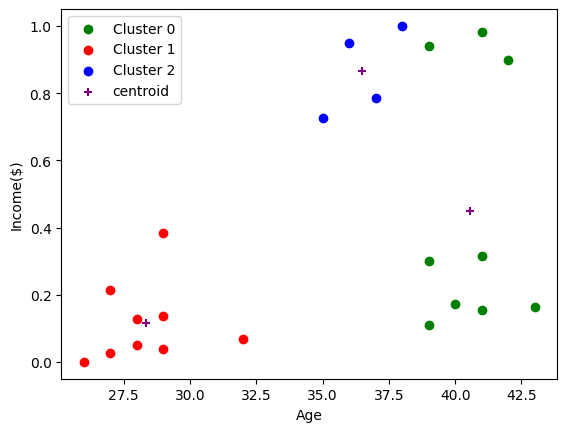

In [44]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color='green', label='Cluster 0')
plt.scatter(df1.Age, df1['Income($)'], color='red', label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker = '+',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

plt.show()


In [56]:
k_rng = range(1,18)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [57]:
sse

[734.1763833270244,
 92.54628677464531,
 46.51741260217044,
 27.99449755886722,
 17.617425944188764,
 10.600399347407894,
 8.005754011736919,
 5.376994910755595,
 4.60815861884238,
 3.3803966688582077,
 2.665863101760538,
 2.1615774222611837,
 1.502982930333358,
 0.8481992840967202,
 0.47533299242700977,
 0.1151411108676066,
 0.05633172620352108]

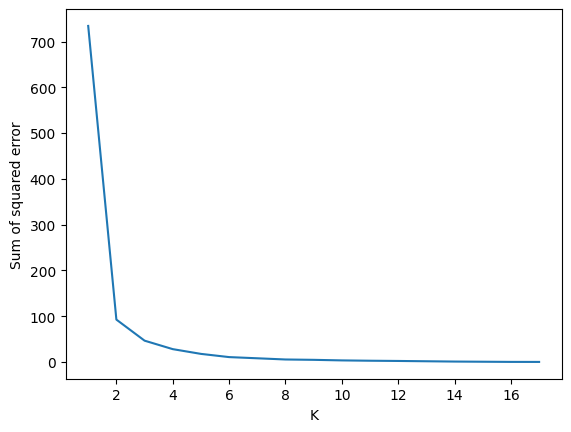

In [58]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)